In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>  # **Exploratory Data Analysis (EDA)**

# Load dataset

In [3]:
df = pd.read_csv('student-por.csv', sep=';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


# Basic statistics

In [4]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

# Check for missing values

In [5]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Visualize distribution of target variable

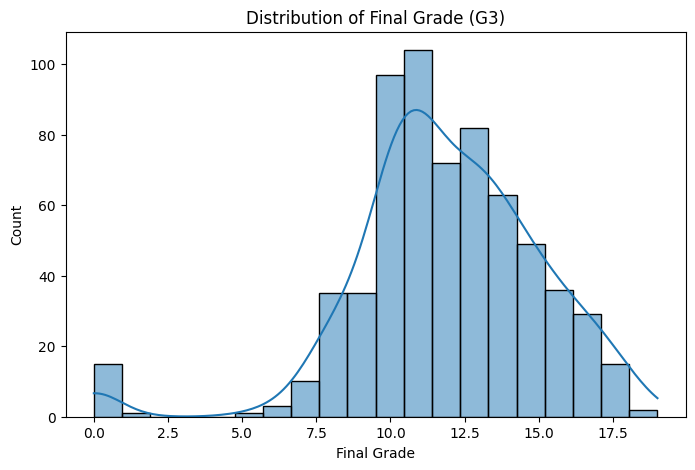

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

# Correlation Matrix

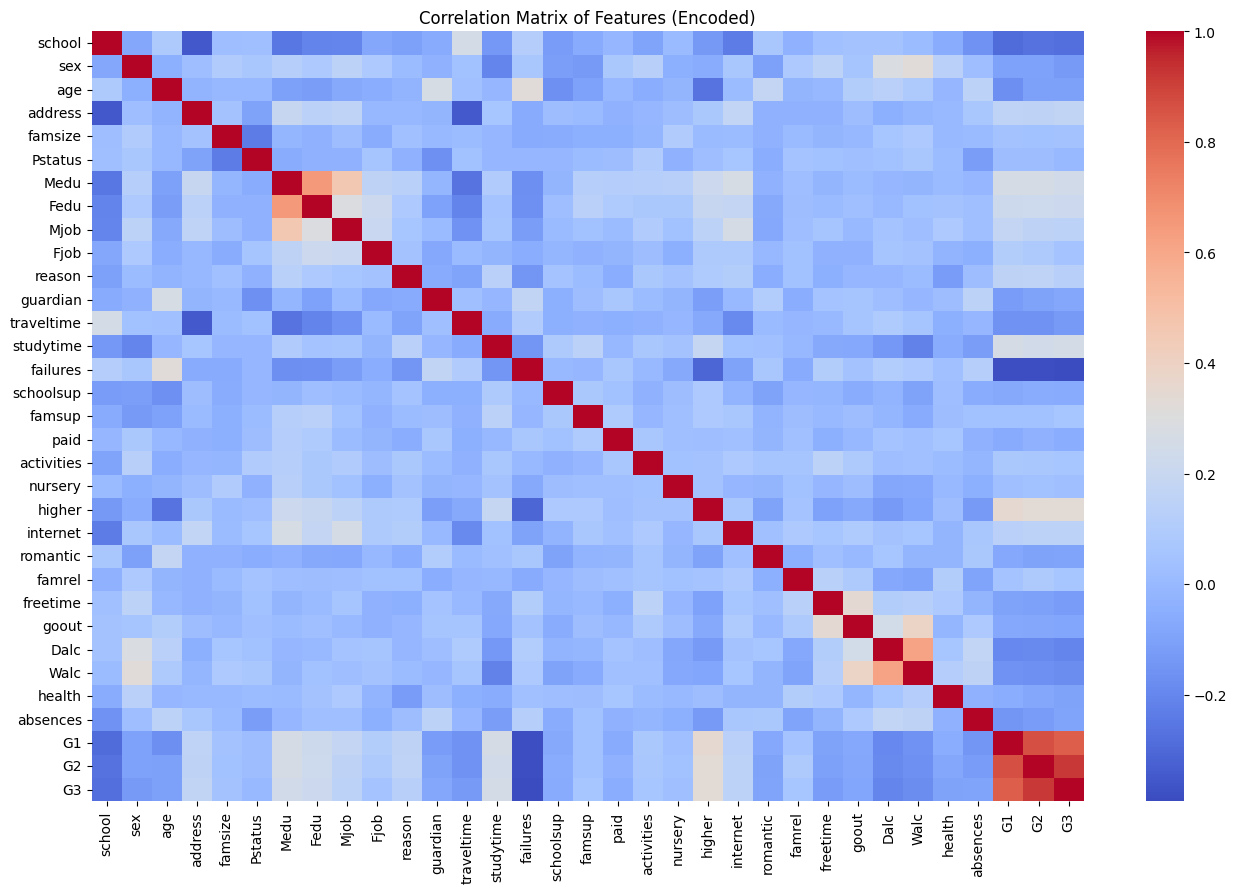

In [8]:
plt.figure(figsize=(16, 10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Features (Encoded)")
plt.show()


# Correlation with Target Variable

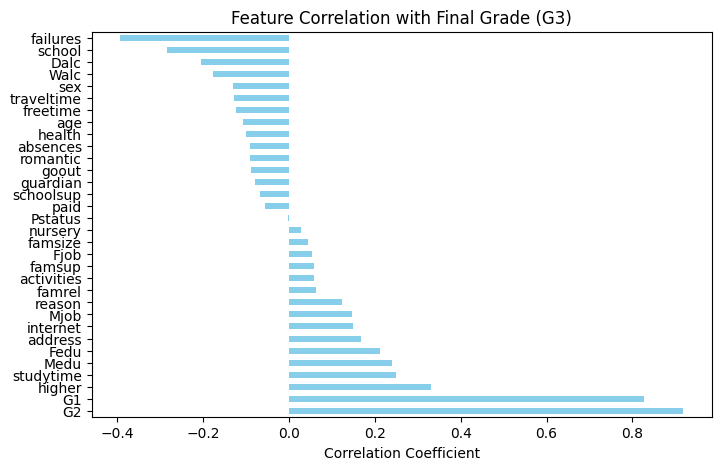

In [9]:
corr_with_target = corr_matrix['G3'].sort_values(ascending=False)
plt.figure(figsize=(8, 5))
corr_with_target.drop('G3').plot(kind='barh', color='skyblue')
plt.title("Feature Correlation with Final Grade (G3)")
plt.xlabel("Correlation Coefficient")
plt.show()


# Distribution of Final Grades by Gender

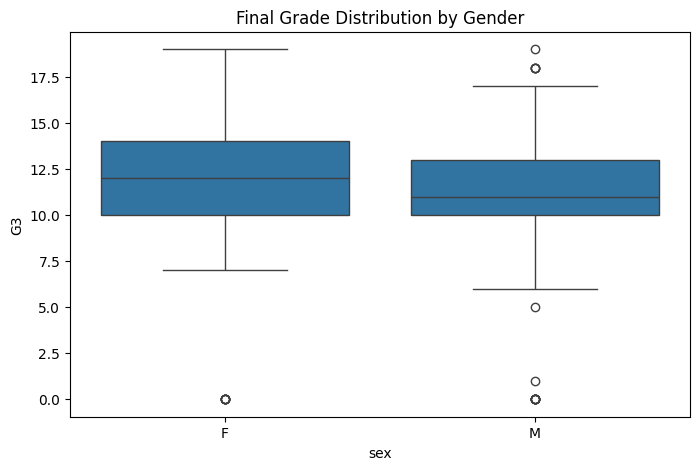

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='G3', data=df)
plt.title("Final Grade Distribution by Gender")
plt.show()


# Family Relationship vs Final Grade

C:\Users\Noor\AppData\Local\Temp\ipykernel_12820\2162455856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='famrel', y='G3', data=df, palette='coolwarm')


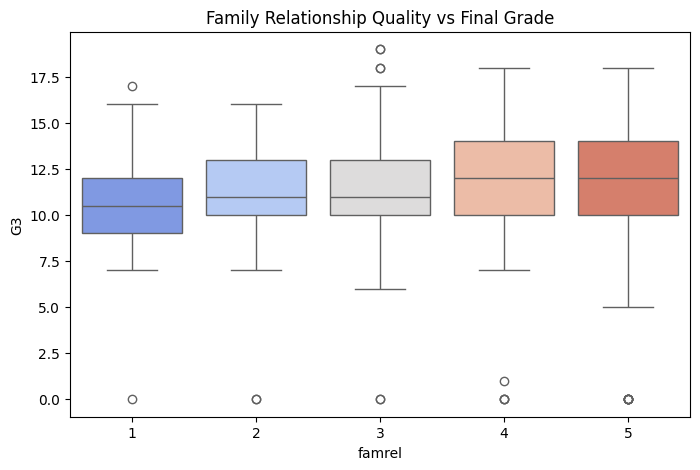

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='famrel', y='G3', data=df, palette='coolwarm')
plt.title("Family Relationship Quality vs Final Grade")
plt.show()


# Effect of Study Time on Final Grade

C:\Users\Noor\AppData\Local\Temp\ipykernel_12820\959122635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='Blues')


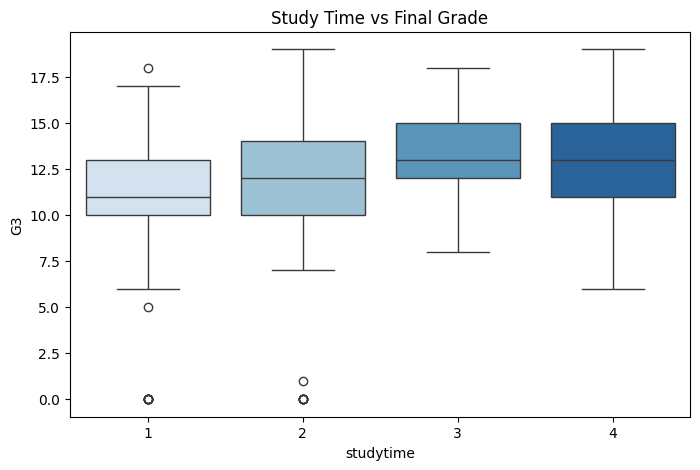

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='studytime', y='G3', data=df, palette='Blues')
plt.title("Study Time vs Final Grade")
plt.show()


# Outlier Detection

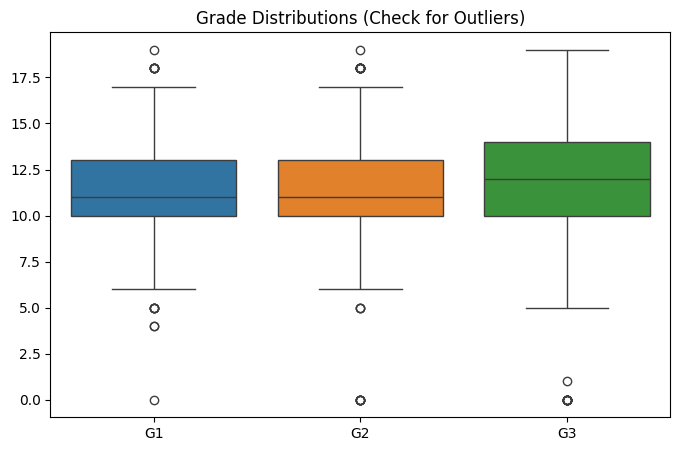

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['G1', 'G2', 'G3']])
plt.title("Grade Distributions (Check for Outliers)")
plt.show()

# Check for Class Imbalance (if G3 is Categorized)

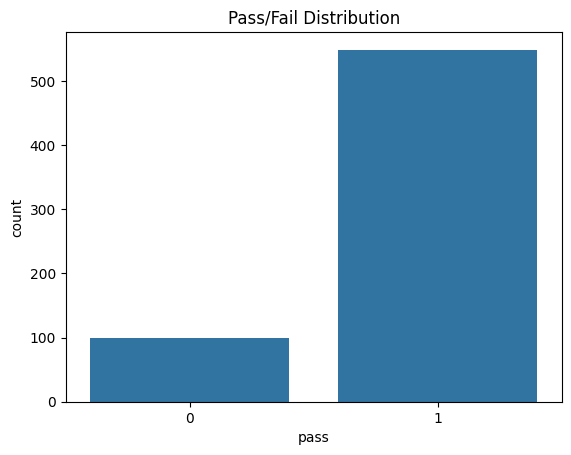

In [30]:
df['pass'] = (df['G3'] >= 10).astype(int)
sns.countplot(x='pass', data=df)
plt.title("Pass/Fail Distribution")
plt.show()

# **Data Cleaning & Preprocessing**

# Binary encoding

In [14]:
binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
                'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
                'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'GP': 1, 'MS': 0,
                           'F': 1, 'M': 0, 'U': 1, 'R': 0, 'LE3': 1, 'GT3': 0,
                           'T': 1, 'A': 0})


# One-Hot encoding

In [15]:
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


# Features & target

In [16]:
X = df.drop('G3', axis=1)
y = df['G3']


# Train-Test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Model Training & Evaluation**

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("\n🔹 Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))



🔹 Linear Regression:
MSE: 1.4759092563639307
R2 Score: 0.8486513286537315


# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random Forest doesn’t need scaling

y_pred_rf = rf.predict(X_test)
print("\n🔹 Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))




🔹 Random Forest Regressor:
MSE: 1.5891753846153849
R2 Score: 0.8370363340695613


# Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)  # Gradient Boosting doesn’t need scaling

y_pred_gb = gb.predict(X_test)
print("\n🔹 Gradient Boosting Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))



🔹 Gradient Boosting Regressor:
MSE: 1.792651613657914
R2 Score: 0.8161706495545087


# Hyperparameter Tuning (Grid Search)

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf, cv=3, scoring='r2', n_jobs=-1)

grid_rf.fit(X_train, y_train)
print("\n🔹 Best Random Forest Parameters:")
print(grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best RF R2 Score:", r2_score(y_test, y_pred_best_rf))



🔹 Best Random Forest Parameters:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best RF R2 Score: 0.8388066432166873


# Model Comparison Visualization

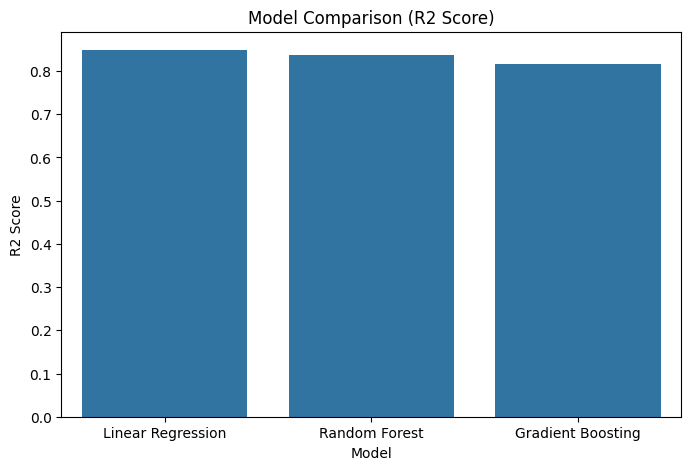

In [23]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'R2': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_gb)]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2', data=results)
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()


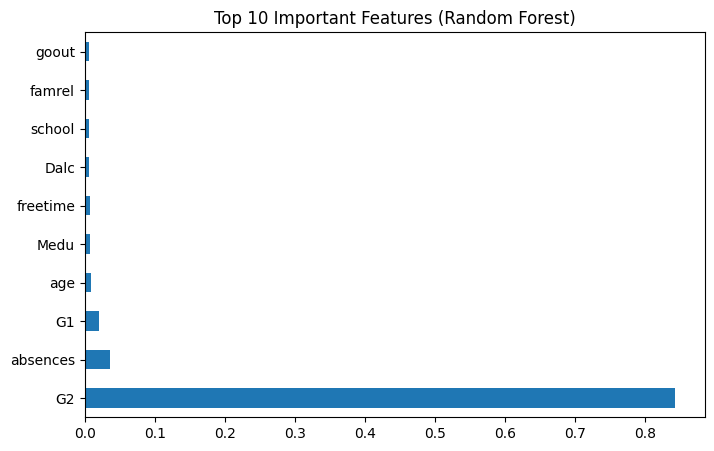

In [24]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
top_features.plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()





# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} - Mean R2: {scores.mean():.3f} (±{scores.std():.3f})")


Linear Regression - Mean R2: 0.836 (±0.043)
Random Forest - Mean R2: 0.854 (±0.064)
Gradient Boosting - Mean R2: 0.841 (±0.061)


# **Model Evaluation Visualizations**

# Actual vs Predicted Scatter Plot

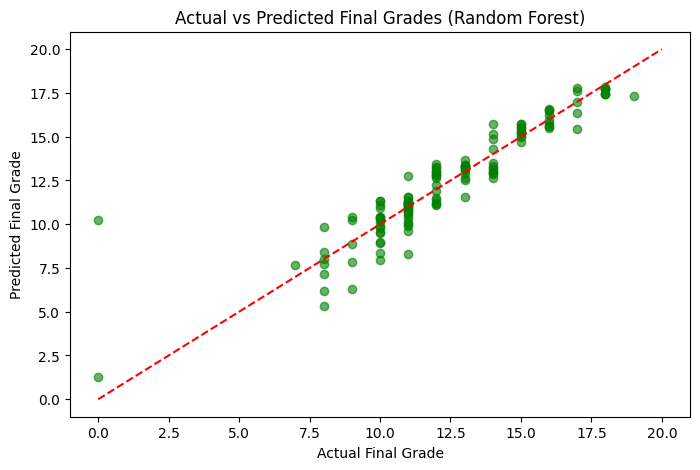

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([0, 20], [0, 20], '--r')
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Final Grades (Random Forest)")
plt.show()


# Residuals Plot

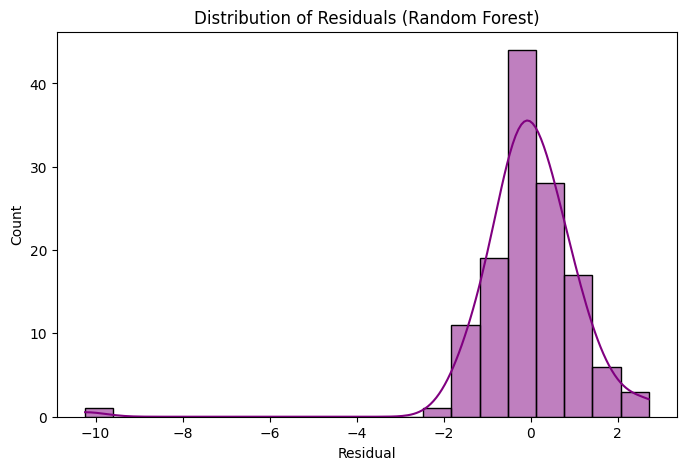

In [27]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title("Distribution of Residuals (Random Forest)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()


# Feature Importance Heatmap

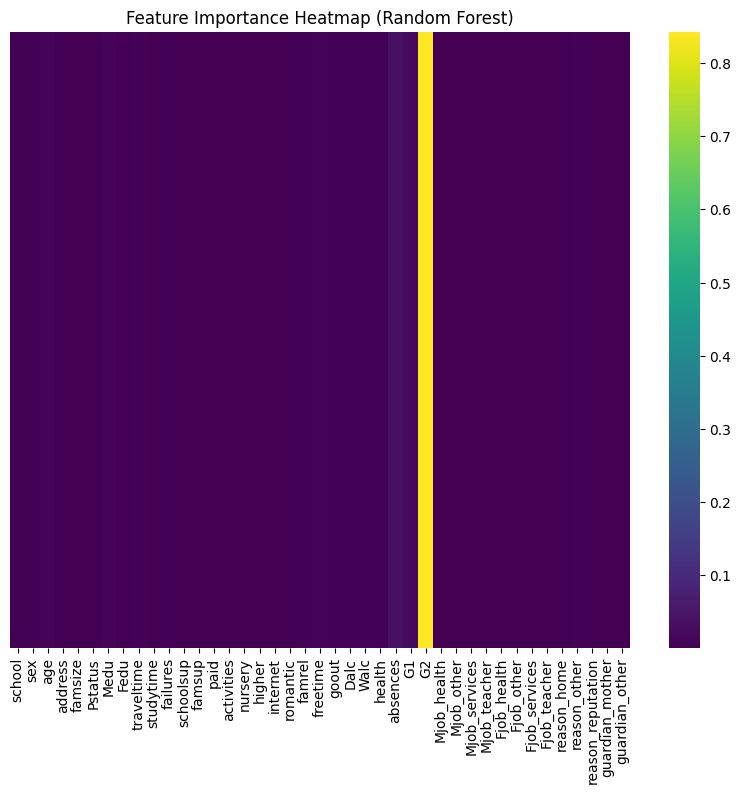

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(importances.values.reshape(1, -1), cmap='viridis', 
            annot=False, cbar=True, xticklabels=importances.index, yticklabels=[])
plt.title("Feature Importance Heatmap (Random Forest)")
plt.xticks(rotation=90)
plt.show()
